<a href="https://colab.research.google.com/github/VEHEMENT2003/-Data-Analytics/blob/main/FORECASTING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas numpy matplotlib statsmodels


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA



In [ ]:
# Load the data
file_path = '/content/gold_monthly_csv.csv'
data = pd.read_csv(file_path, index_col='Date', parse_dates=True)

# Display the first few rows of the data
print(data.head())

# Identify the column with time series data (assuming there's only one data column besides the date index)
time_series_column = data.columns[0]
print(f'Time series column: {time_series_column}')

# Check for missing values
missing_values = data.isnull().sum()
print("Missing values before filling:", missing_values)

# Handle missing values by forward filling
data.fillna(method='ffill', inplace=True)

# Check again for missing values to ensure there are none
missing_values_after_fill = data.isnull().sum()
print("Missing values after filling:", missing_values_after_fill)


            Price
Date             
1950-01-01  34.73
1950-02-01  34.73
1950-03-01  34.73
1950-04-01  34.73
1950-05-01  34.73
Time series column: Price
Missing values before filling: Price    0
dtype: int64
Missing values after filling: Price    0
dtype: int64


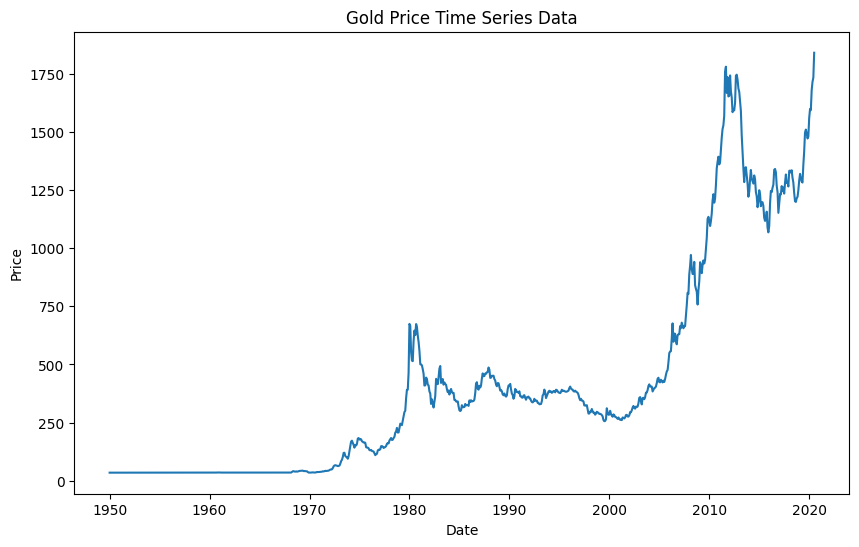

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(data['Price'])
plt.title('Gold Price Time Series Data')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()


In [ ]:
result = adfuller(data['Price'])
adf_statistic = result[0]
p_value = result[1]
critical_values = result[4]

print('ADF Statistic:', adf_statistic)
print('p-value:', p_value)
print('Critical Values:')
for key, value in critical_values.items():
    print(f'   {key}: {value}')


ADF Statistic: 0.8143240077835238
p-value: 0.9918639010465631
Critical Values:
   1%: -3.4382057088878644
   5%: -2.865007578546518
   10%: -2.5686164240381513


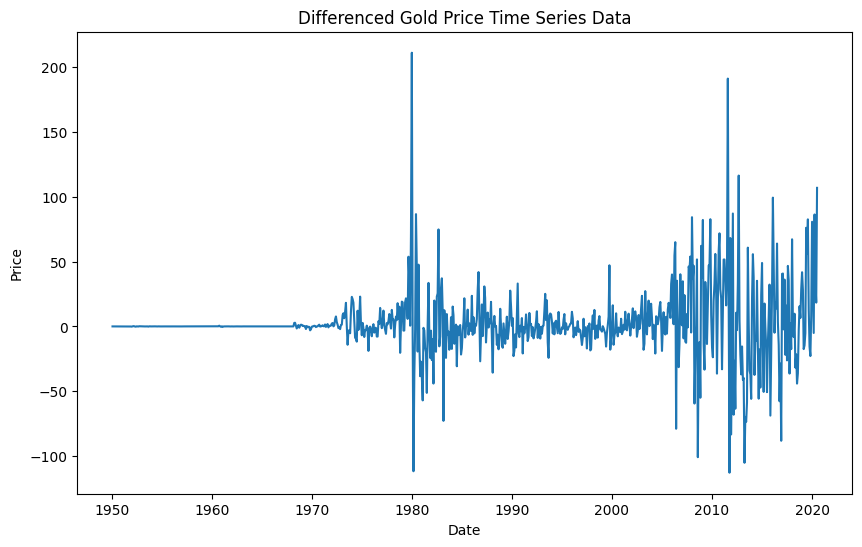

Differenced ADF Statistic: -6.21708692640733
Differenced p-value: 5.333282513342447e-08
Differenced Critical Values:
   1%: -3.4382057088878644
   5%: -2.865007578546518
   10%: -2.5686164240381513


In [ ]:
data_diff = data['Price'].diff().dropna()

# Plot the differenced data
plt.figure(figsize=(10, 6))
plt.plot(data_diff)
plt.title('Differenced Gold Price Time Series Data')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

# Check for stationarity again
result_diff = adfuller(data_diff)
adf_statistic_diff = result_diff[0]
p_value_diff = result_diff[1]
critical_values_diff = result_diff[4]

print('Differenced ADF Statistic:', adf_statistic_diff)
print('Differenced p-value:', p_value_diff)
print('Differenced Critical Values:')
for key, value in critical_values_diff.items():
    print(f'   {key}: {value}')



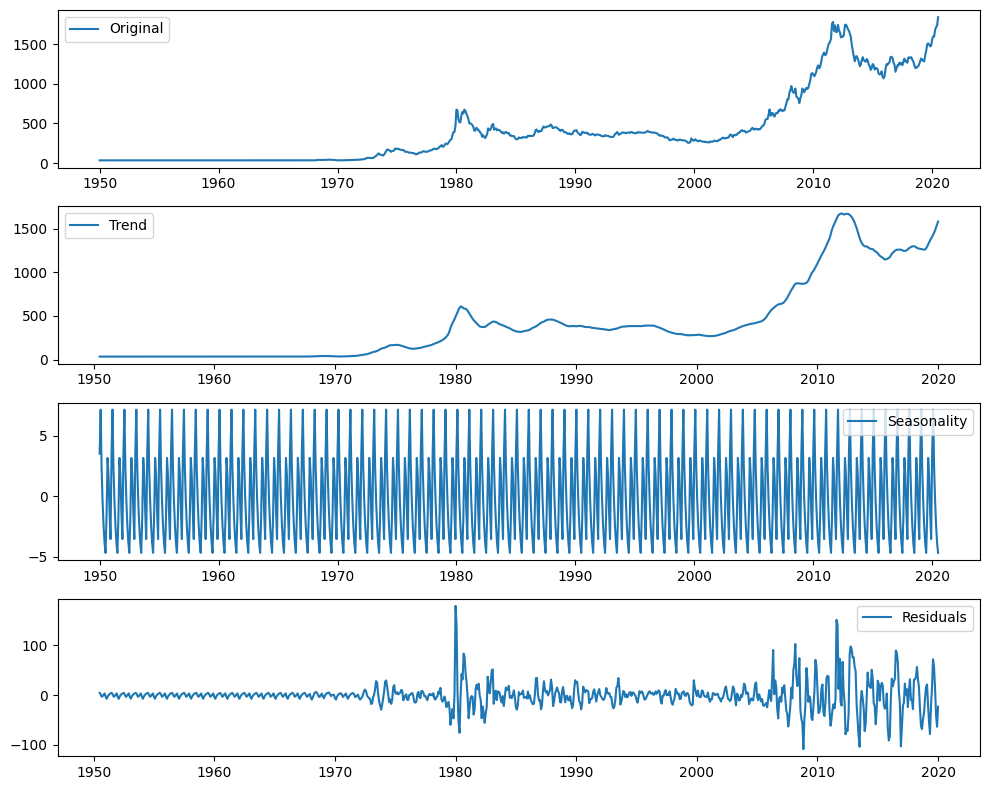

In [ ]:
decomposition = seasonal_decompose(data['Price'], model='additive')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(10, 8))
plt.subplot(411)
plt.plot(data['Price'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()



In [ ]:
# Choose appropriate (p, d, q) values
p, d, q = 1, 1, 1

model = ARIMA(data['Price'], order=(p, d, q))
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                  847
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3894.605
Date:                Sat, 13 Jul 2024   AIC                           7795.209
Time:                        03:39:26   BIC                           7809.431
Sample:                    01-01-1950   HQIC                          7800.658
                         - 07-01-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5398      0.042    -12.838      0.000      -0.622      -0.457
ma.L1          0.7664      0.031     24.425      0.000       0.705       0.828
sigma2       583.4947     10.859     53.736      0.0

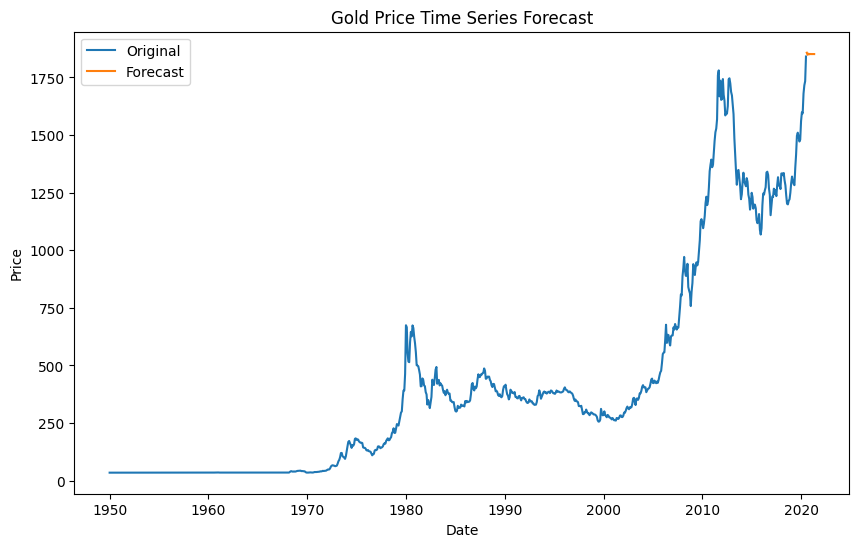

Forecasted Values:
2020-08-01    1857.333553
2020-09-01    1848.411821
2020-10-01    1853.228149
2020-11-01    1850.628091
2020-12-01    1852.031713
2021-01-01    1851.273978
2021-02-01    1851.683035
2021-03-01    1851.462209
2021-04-01    1851.581420
2021-05-01    1851.517065
Freq: MS, Name: predicted_mean, dtype: float64


In [ ]:
# Forecast
forecast_steps = 10  # Number of steps to forecast
forecast = model_fit.forecast(steps=forecast_steps)

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(data['Price'], label='Original')
plt.plot(pd.date_range(start=data.index[-1], periods=forecast_steps, freq='M'), forecast, label='Forecast')
plt.title('Gold Price Time Series Forecast')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Print the forecasted values
print("Forecasted Values:")
print(forecast)
